# Data Pull and Train / Test Sets 

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
split_index = 60000
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# SGD model Fitting to Training Set, Accuracy Calculation

In [5]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

In [6]:
forest.fit(X_train, y_train)

c:\users\cjcal\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.94920000000000004

# Image Augmentation Functions to Expand Training Set

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
def shift_up(bmp, side_length=28):
    img = np.reshape(bmp, (side_length, side_length))
    img = np.delete(img, 0, 0)
    img = np.append(img, [np.zeros(side_length)], axis=0)
    return np.reshape(img, side_length**2)

In [10]:
def shift_down(bmp, side_length=28):
    img = np.reshape(bmp, (side_length, side_length))
    img = np.delete(img, side_length-1, 0)
    img = np.insert(img, 0, [np.zeros(side_length)], axis=0)
    return np.reshape(img, side_length**2)

In [11]:
def shift_left(bmp, side_length=28):
    img = np.reshape(bmp, (side_length, side_length))
    img = np.delete(img, 0, 1)
    zeroes = np.zeros((side_length, side_length))
    zeroes[:,:-1] = img
    return np.reshape(zeroes, side_length**2)

In [12]:
def shift_right(bmp, side_length=28):
    img = np.reshape(bmp, (side_length, side_length))
    img = np.delete(img, side_length-1, 1)
    zeroes = np.zeros((side_length, side_length))
    zeroes[:,1:] = img
    return np.reshape(zeroes, side_length**2)

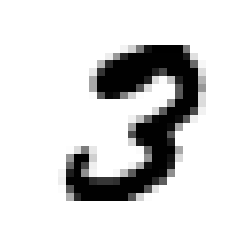

In [13]:
img = X_train[12345]
plot_digit(img)

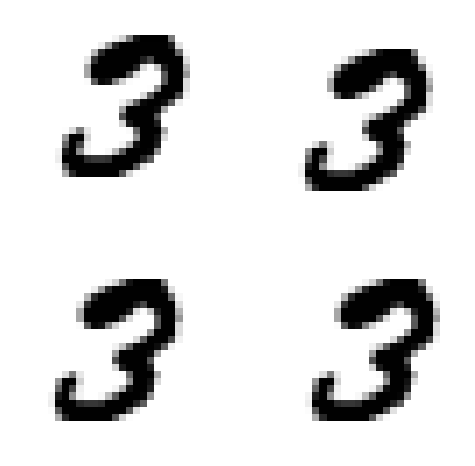

In [14]:
img_shifted_up=shift_up(img)
img_shifted_down = shift_down(img)
img_shifted_left = shift_left(img)
img_shifted_right = shift_right(img)

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digit(img_shifted_up)
plt.subplot(222); plot_digit(img_shifted_down)
plt.subplot(223); plot_digit(img_shifted_left)
plt.subplot(224); plot_digit(img_shifted_right)

# Training Set Augmentation

In [15]:
X_train_up = np.array([shift_up(shift_up(img)) for img in X_train])
X_train_down = np.array([shift_down(shift_down(img)) for img in X_train])
X_train_left = np.array([shift_left(shift_left(img)) for img in X_train])
X_train_right = np.array([shift_right(shift_right(img)) for img in X_train])

X_train_up.shape, X_train_down.shape, X_train_left.shape, X_train_right.shape

((60000, 784), (60000, 784), (60000, 784), (60000, 784))

In [16]:
X_train_augmented = X_train
X_train_augmented = np.append(X_train_augmented, X_train_up, axis=0)
X_train_augmented = np.append(X_train_augmented, X_train_down, axis=0)
X_train_augmented = np.append(X_train_augmented, X_train_left, axis=0)
X_train_augmented = np.append(X_train_augmented, X_train_right, axis=0)
X_train_augmented.shape

(300000, 784)

In [17]:
y_train_augmented = y_train
for _ in range(4):
    y_train_augmented = np.append(y_train_augmented, y_train, axis=0)
y_train_augmented.shape

(300000,)

# Training SGD on Augmented Dataset

In [ ]:
forest.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)